In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import read_csv
import math
from tensorflow.keras.optimizers import Adam

2023-06-19 17:33:40.692956: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df1 = pd.read_csv('/uscms/home/jieun201/nobackup/YOURWORKINGAREA/dec6_ds8/FullPrecisionInputTrainSet.csv')
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,y-local
0,0.0,0.0,0.0,0.0,0.0,2831.0,6579.0,0.0,0.0,0.0,0.0,0.0,0.0,6.082510
1,0.0,0.0,268.0,2786.0,7364.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.385020
2,0.0,0.0,0.0,0.0,37.0,3984.0,5093.0,0.0,0.0,0.0,0.0,0.0,0.0,2.585680
3,0.0,0.0,0.0,0.0,1121.0,7458.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.084500
4,0.0,0.0,0.0,0.0,0.0,7077.0,49944.0,41.0,0.0,0.0,0.0,0.0,0.0,3.180250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652155,0.0,0.0,22.0,25742.0,30056.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.679302
652156,0.0,0.0,0.0,4.0,1160.0,1714.0,5285.0,1977.0,0.0,0.0,0.0,0.0,0.0,-0.719806
652157,0.0,2257.0,19422.0,9225.0,8763.0,11063.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.042060
652158,0.0,0.0,0.0,14.0,7877.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.781100


In [3]:
df2 = pd.read_csv('/uscms/home/jieun201/nobackup/YOURWORKINGAREA/dec6_ds8/TrainSetLabel.csv')
df2

,ptLabel
0,0
1,0
2,0
3,1
4,1
...,...
652155,1
652156,2
652157,0
652158,1


In [4]:
df3 = pd.read_csv('/uscms/home/jieun201/nobackup/YOURWORKINGAREA/dec6_ds8/FullPrecisionInputTestSet.csv')
df3

,0,1,2,3,4,5,6,7,8,9,10,11,12,y-local
0,0.0,0.0,0.0,3808.0,12534.0,3798.0,4279.0,7827.0,0.0,0.0,0.0,0.0,0.0,-6.033320
1,0.0,0.0,745.0,2884.0,3621.0,4573.0,2749.0,2968.0,173.0,0.0,0.0,0.0,0.0,-7.951870
2,0.0,0.0,0.0,941.0,4359.0,2945.0,3258.0,2788.0,1415.0,0.0,0.0,0.0,0.0,-6.470030
3,0.0,52.0,1967.0,1961.0,1887.0,404.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.741504
4,0.0,0.0,0.0,0.0,954.0,26779.0,20861.0,0.0,0.0,0.0,0.0,0.0,0.0,4.328340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163035,0.0,0.0,0.0,708.0,2343.0,1778.0,1237.0,0.0,0.0,0.0,0.0,0.0,0.0,0.483321
163036,0.0,0.0,0.0,0.0,90.0,34400.0,29959.0,0.0,0.0,0.0,0.0,0.0,0.0,1.904030
163037,0.0,0.0,1.0,2803.0,6903.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.946580
163038,0.0,0.0,0.0,0.0,0.0,0.0,30153.0,5232.0,0.0,0.0,0.0,0.0,0.0,6.688010


In [5]:
df4 = pd.read_csv('/uscms/home/jieun201/nobackup/YOURWORKINGAREA/dec6_ds8/TestSetLabel.csv')
df4

,ptLabel
0,0
1,2
2,0
3,2
4,0
...,...
163035,0
163036,1
163037,0
163038,1


In [6]:
X_train = df1.values
X_test = df3.values

y_train = df2.values
y_test = df4.values
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(652160, 14) (163040, 14) (652160, 1) (163040, 1)


In [7]:
y_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [9]:
X_test

array([[-0.06867277, -0.12636668, -0.33102477, ..., -0.05094641,
        -0.04397832, -1.33157189],
       [-0.06867277, -0.12636668,  0.02015624, ..., -0.05094641,
        -0.04397832, -1.75712242],
       [-0.06867277, -0.12636668, -0.33102477, ..., -0.05094641,
        -0.04397832, -1.42843784],
       ...,
       [-0.06867277, -0.12636668, -0.33055338, ..., -0.05094641,
        -0.04397832,  0.43843704],
       [-0.06867277, -0.12636668, -0.33102477, ..., -0.05094641,
        -0.04397832,  1.4901261 ],
       [-0.06867277, -0.12636668, -0.33102477, ..., -0.05094641,
        -0.04397832,  1.71097851]])

In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(14,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False), # default from_logits=False
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 14)                0         
                                                                 
 dense (Dense)               (None, 128)               1920      
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 2,307
Trainable params: 2,307
Non-trainable params: 0
_________________________________________________________________


In [11]:
es = EarlyStopping(monitor='val_sparse_categorical_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=20,
                                   restore_best_weights=True)

history = model.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=200, 
                    batch_size=1024,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)



Epoch 1/200
510/510 [==============================] - 2s 3ms/step - loss: 0.8852 - sparse_categorical_accuracy: 0.5760 - val_loss: 0.7985 - val_sparse_categorical_accuracy: 0.6300
Epoch 2/200
510/510 [==============================] - 1s 2ms/step - loss: 0.7665 - sparse_categorical_accuracy: 0.6501 - val_loss: 0.7430 - val_sparse_categorical_accuracy: 0.6688
Epoch 3/200
510/510 [==============================] - 1s 3ms/step - loss: 0.7265 - sparse_categorical_accuracy: 0.6786 - val_loss: 0.7117 - val_sparse_categorical_accuracy: 0.6881
Epoch 4/200
510/510 [==============================] - 1s 2ms/step - loss: 0.6985 - sparse_categorical_accuracy: 0.6964 - val_loss: 0.6867 - val_sparse_categorical_accuracy: 0.7020
Epoch 5/200
510/510 [==============================] - 1s 2ms/step - loss: 0.6769 - sparse_categorical_accuracy: 0.7071 - val_loss: 0.6696 - val_sparse_categorical_accuracy: 0.7101
Epoch 6/200
510/510 [==============================] - 1s 2ms/step - loss: 0.6603 - sparse_cate

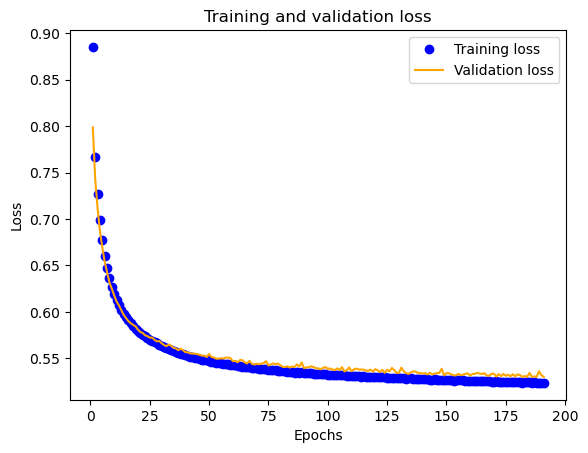

In [12]:
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 
epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss.png')

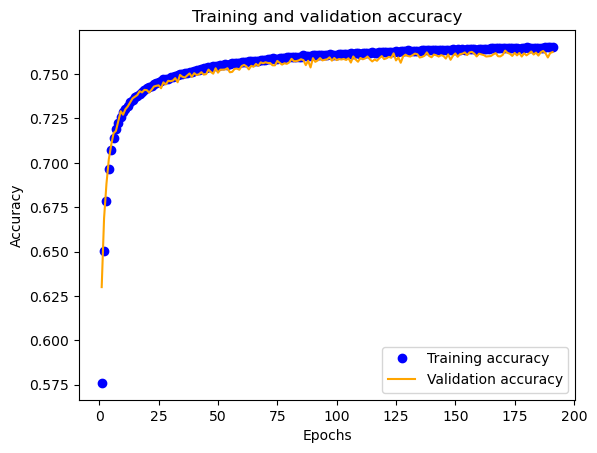

In [13]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
#np.max(val_acc)
plt.savefig('accuracy.png')
plt.show()

In [14]:
preds = model.predict(X_test) 
predictionsFiles =np.argmax(preds, axis=1)

5095/5095 [==============================] - 5s 1ms/step


In [15]:
pd.DataFrame(predictionsFiles).to_csv("predictionsFiles.csv",header='predict', index=False)

In [16]:
pd.DataFrame(y_test).to_csv("true.csv",header='true', index=False)

In [17]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.541736364364624
Test accuracy: 0.7549742460250854


Confusion matrix:
[[63699  7558 10263]
 [12972 27310   478]
 [ 8606    72 32082]]


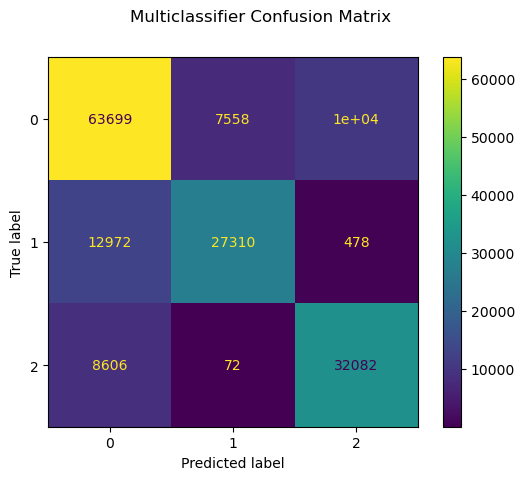

In [18]:
from sklearn import datasets, svm, metrics
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictionsFiles)
disp.figure_.suptitle("Multiclassifier Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.savefig('confusionMatrix.png')
plt.show()